Observations:
1) Average Temperature decreases as you get farther from the equator
2) Northern hemispher tends to have less humidity
3) Wind speed has no correlation to distance from the equator

In [1]:
#Import Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests as req
import json
import os
from citipy import citipy
import openweathermapy as ow
import datetime
from localenv import weather_api_key

In [2]:
#Set DataFrame for random latitudes and longitudes
location_df=pd.DataFrame()

In [3]:
#Get random latitude and longitudes. Append them to DataFram
for x in range(1000):
    rand_latitude= np.random.uniform(low=-90.000,high=90.000,size=1)
    rand_longitude=np.random.uniform(low=-180.000,high=180.000,size=1)
    random_loc=pd.DataFrame([[rand_latitude,rand_longitude]],columns=['latitude','longitude']).astype(float)
    location_df=location_df.append(random_loc)
new_location_df=location_df.reset_index()
new_location_df.head()

,index,latitude,longitude
0,0,-9.629161,6.963994
1,0,-4.004788,-26.838089
2,0,-86.975818,17.807260
3,0,-60.585417,-23.697156
4,0,-6.142432,120.260848


In [4]:
#Find nearest city to random latitude/longitude
city_list=[]
counter=0
while counter <620:
    lat=new_location_df['latitude'][counter]
    lon=new_location_df['longitude'][counter]
    city=citipy.nearest_city(lat,lon)
    city_name=city.city_name
    country_code=city.country_code
    
    if city_name not in city_list:
        city_list.append([city_name,country_code,lat,lon])
    counter +=1

In [38]:
#create Data Frame for random cities
city_list_df=pd.DataFrame(city_list,columns=['city_name','country_code','latitude','longitude'])
city_list_df['city_name']
city_list_df.count()

city_name       620
country_code    620
latitude        620
longitude       620
dtype: int64

In [39]:
#set parameters for url
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key= weather_api_key
api_fake_key="api_key"
url_i_noapi="{}q={}&appid={}&units=imperial".format(url,c,api_fake_key)

In [40]:
#convert cities into list that we can pass through for loop
cities=city_list_df['city_name']
cities_list=list(cities.values.flatten())
len(cities_list)

620

In [42]:
#Pass list of cities through for loop to create urls
url_list=[]
count=0
for c in cities_list:
    url_id="{}q={}&appid={}&units=imperial".format(url,c,api_fake_key)
    count+=1
    print("Count:{}  City:{}  Url:{}".format(count,c,url_id))
    url_list.append(url_id)

Count:1  City:luanda  Url:http://api.openweathermap.org/data/2.5/weather?q=luanda&appid=api_key&units=imperial
Count:2  City:cabedelo  Url:http://api.openweathermap.org/data/2.5/weather?q=cabedelo&appid=api_key&units=imperial
Count:3  City:bredasdorp  Url:http://api.openweathermap.org/data/2.5/weather?q=bredasdorp&appid=api_key&units=imperial
Count:4  City:chuy  Url:http://api.openweathermap.org/data/2.5/weather?q=chuy&appid=api_key&units=imperial
Count:5  City:tanete  Url:http://api.openweathermap.org/data/2.5/weather?q=tanete&appid=api_key&units=imperial
Count:6  City:douglas  Url:http://api.openweathermap.org/data/2.5/weather?q=douglas&appid=api_key&units=imperial
Count:7  City:punta arenas  Url:http://api.openweathermap.org/data/2.5/weather?q=punta arenas&appid=api_key&units=imperial
Count:8  City:mataura  Url:http://api.openweathermap.org/data/2.5/weather?q=mataura&appid=api_key&units=imperial
Count:9  City:illoqqortoormiut  Url:http://api.openweathermap.org/data/2.5/weather?q=ill

In [10]:
#Take urls and pass them through for loop to get json data for cities. 
#Pass over any response that does not bring back data.
weather_json_l=[]
for city in url_list:
    response = req.get(city).json()
    if response=={'cod': '404', 'message': 'city not found'}:
        continue
    weather_json_l.append(response)
    
print(len(weather_json_l))

561


In [21]:
if len(weather_json_l)<500:
    print("Add more locations")
else:
    print("Locations greater than 500")

Locations greater than 500


In [11]:
#Get Data for DataFrame
lat_data=[data.get("coord").get("lat") for data in weather_json_l]
temp_data=[data.get("main").get("temp") for data in weather_json_l]
city=[data.get("name") for data in weather_json_l]
humidity=[data.get("main").get("humidity") for data in weather_json_l]
wind_speed=[data.get('wind').get('speed') for data in weather_json_l]
cloud=[data.get('clouds').get('all')for data in weather_json_l]
country=[data.get('sys').get('country')for data in weather_json_l]
date=[data.get('dt') for data in weather_json_l]

In [24]:
#Create DataFrame for weather plots
#Count number of cities to ensure over 500
#Write DataFrame to csv file
weather_dict = {"Temperature(F)": temp_data,
                "Latitude":lat_data,
                "City":city,
                "Humidity":humidity,
                "Wind Speed":wind_speed,
                "Cloudiness":cloud,
                "Country Code":country
               }
weather_df=pd.DataFrame(weather_dict)
weather_df.set_index("City", inplace=True)
weather_df.to_csv('weather_data.csv')
weather_df.head()


,Cloudiness,Country Code,Humidity,Latitude,Temperature(F),Wind Speed
City,,,,,,
Luanda,76,AO,100,-8.83,75.29,4.18
Cabedelo,100,BR,99,-6.97,79.21,10.33
Bredasdorp,0,ZA,100,-34.53,60.94,7.54
Chuy,32,UY,88,-33.69,66.29,7.87
Tanete,36,ID,68,-3.94,88.25,6.76


In [13]:
#Create parameters for scatter plots
temperature=weather_df['Temperature(F)']
latitude=weather_df['Latitude']
humidity=weather_df['Humidity']
cloudiness=weather_df['Cloudiness']
wind_speed=weather_df['Wind Speed']

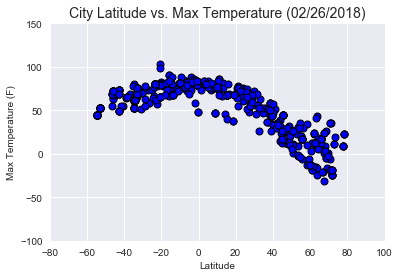

In [37]:
#Create Temp vs. Latitude plot
plt.scatter(y=temperature,x=latitude,c='blue',edgecolors='black', linewidth=1.0)
plt.title('City Latitude vs. Max Temperature (02/26/2018)', fontsize=14)
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Max Temperature (F)',fontsize=10)
plt.xlim(-80,100)
plt.ylim(-100,150)
sns.set()
plt.savefig('City Latitude vs Max Temperature.png')
plt.show()

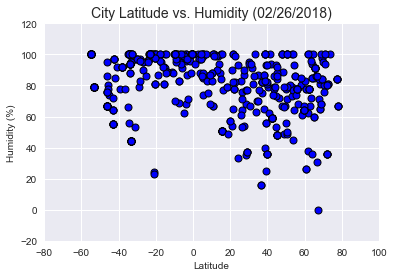

In [32]:
#Create Humidity vs. Latitude plot
plt.scatter(y=humidity,x=latitude,c='blue',edgecolor='black',linewidth=1.0)
plt.title('City Latitude vs. Humidity (02/26/2018)', fontsize=14)
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Humidity (%)',fontsize=10)
plt.xlim(-80,100)
plt.ylim(-20,120)
sns.set()
plt.savefig('City Latitude vs Humidity.png')
plt.show()

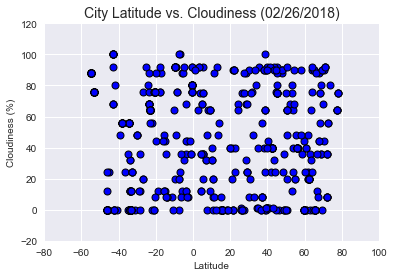

In [35]:
#Create Cloudiness vs. Latitude plot
plt.scatter(y=cloudiness,x=latitude,c='blue',edgecolor='black',linewidth=1.0)
plt.title('City Latitude vs. Cloudiness (02/26/2018)', fontsize=14)
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Cloudiness (%)',fontsize=10)
plt.xlim(-80,100)
plt.ylim(-20,120)
sns.set()
plt.savefig('City Latitude vs Cloudiness.png')
plt.show()

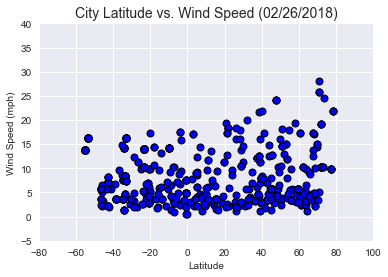

In [36]:
#Create Wind Speed vs. Latitude plot
plt.scatter(y=wind_speed,x=latitude,c='blue',edgecolor='black',linewidth=1.0)
plt.title('City Latitude vs. Wind Speed (02/26/2018)', fontsize=14)
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Wind Speed (mph)',fontsize=10)
plt.ylim(-5,40)
plt.xlim(-80,100)
sns.set()
plt.savefig('City Latitude vs Wind Speed.png')
plt.show()